# Постановка задачи кластеризации

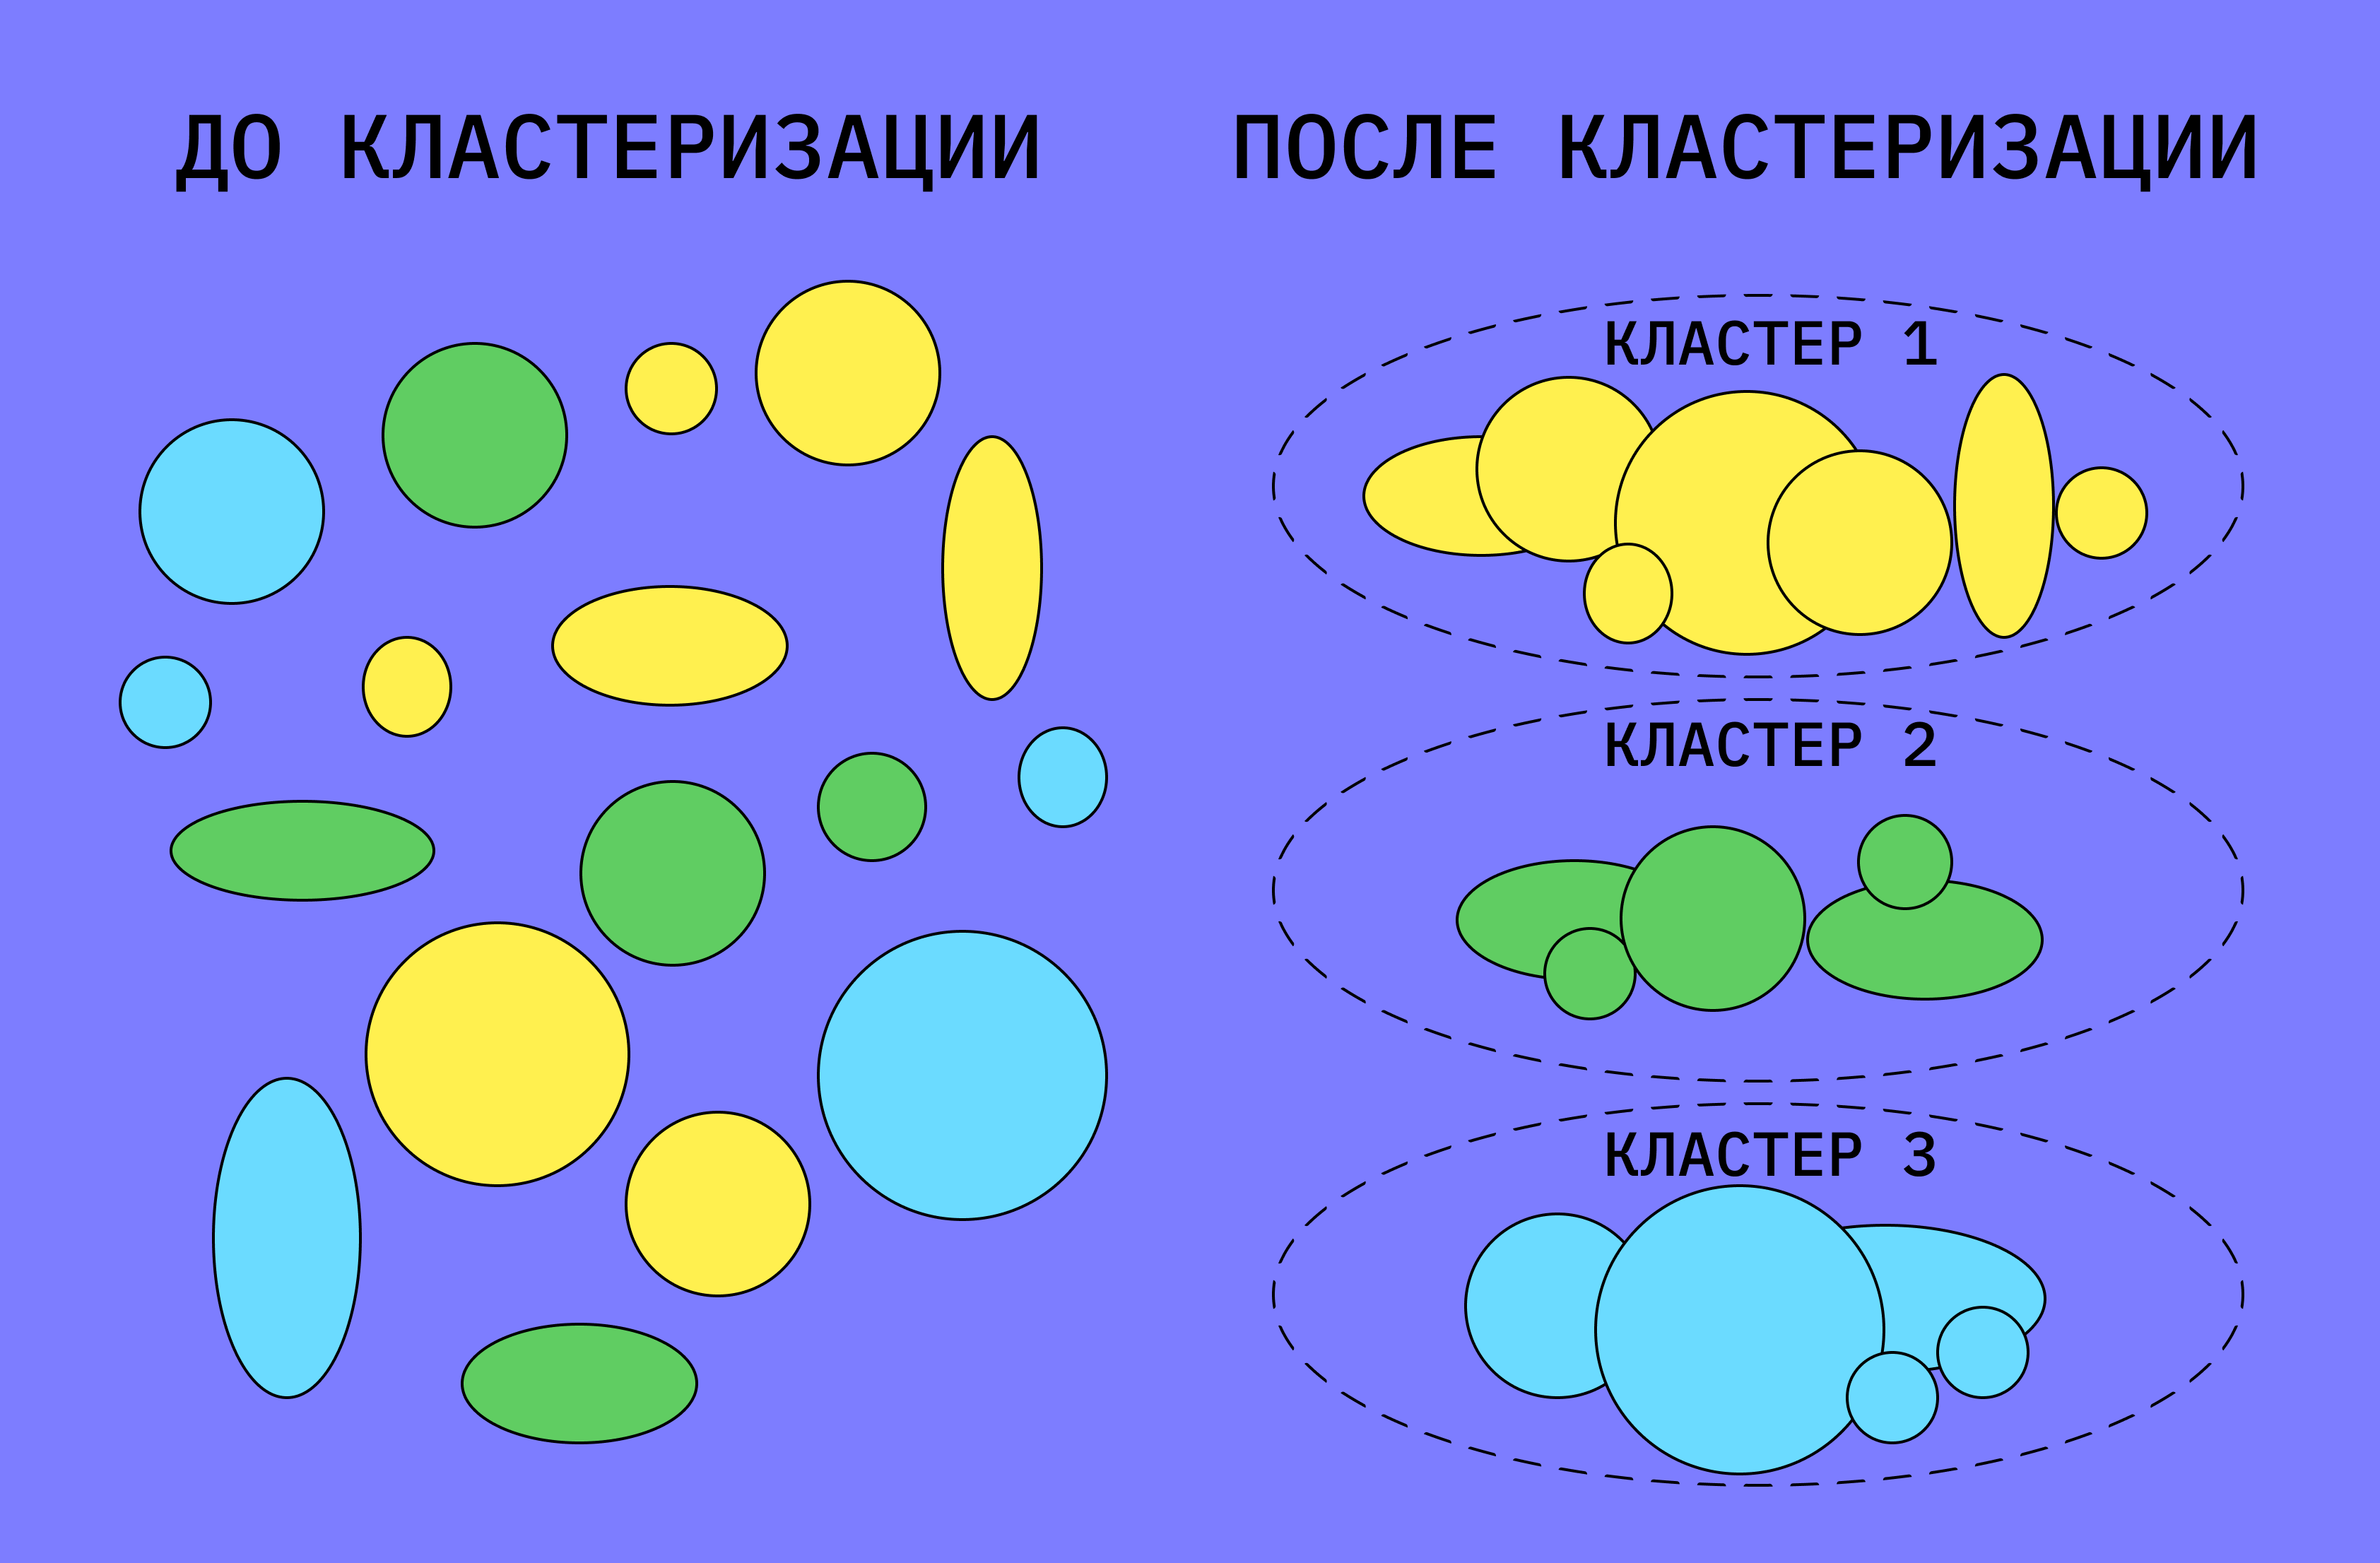

Важно помнить, что в задаче кластеризации, в отличие от классификации, модель обучается на НЕРАЗМЕЧЕННЫХ данных. Мы не знаем заранее, в какой кластер попадёт тот или иной объект.

Классический алгоритм кластеризации - KMeans (отталкиваемся от среднего расстояния "прототипического" объекта до других).

Примерно так можно представить себе работу алгоритма KMeans

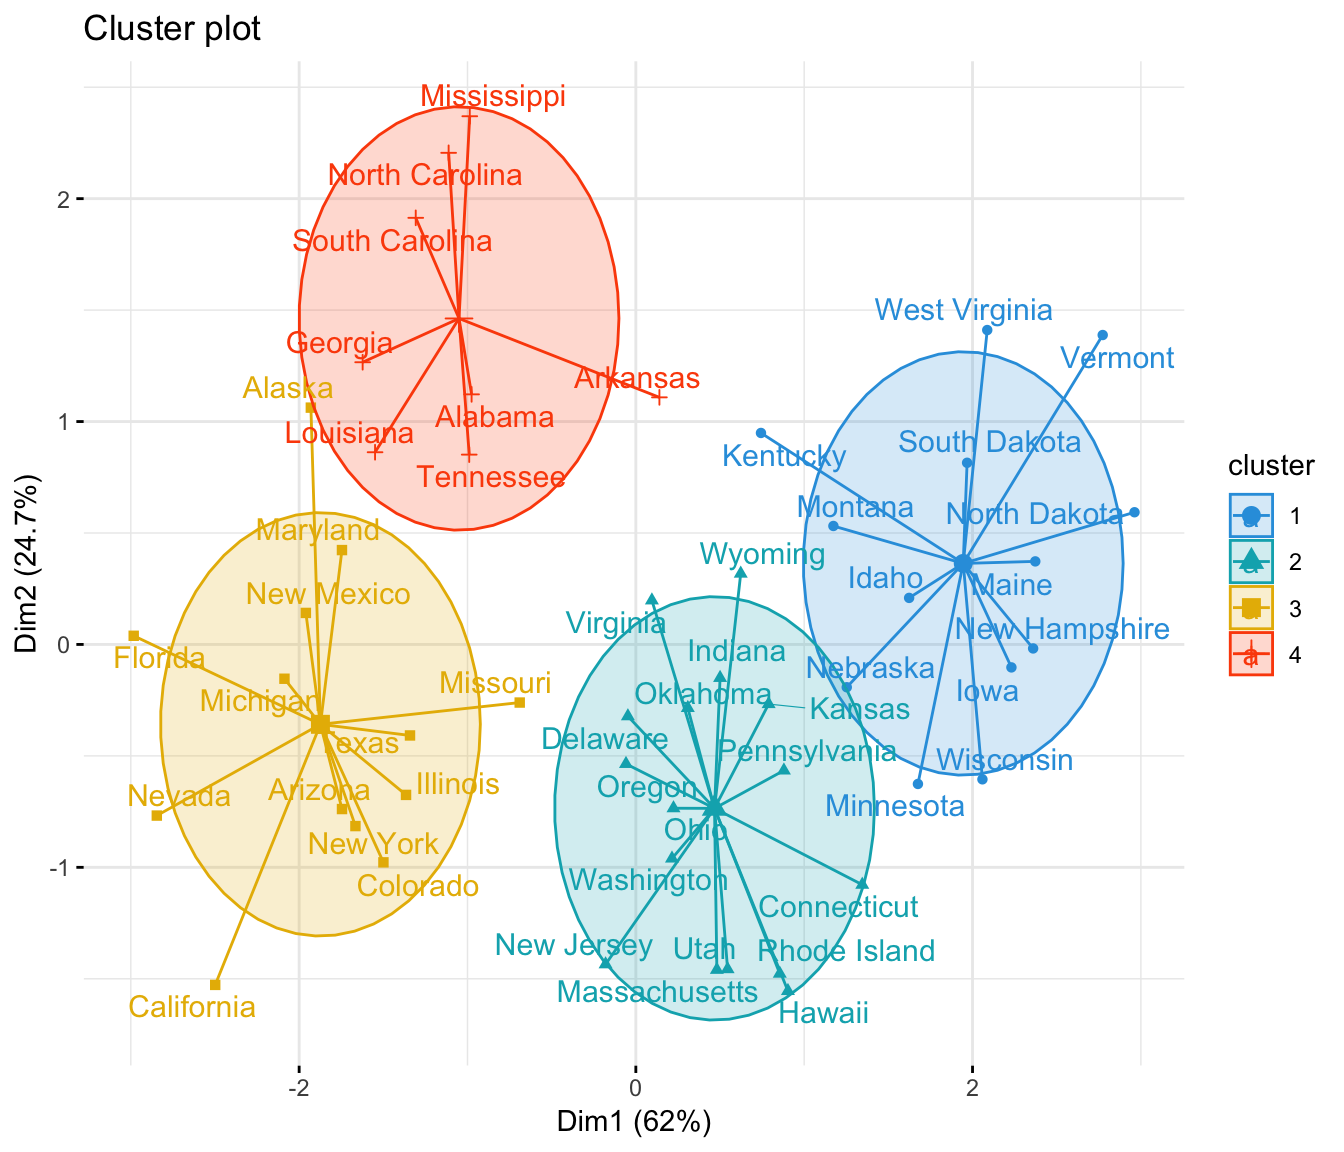

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
english_stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(st):
  x = word_tokenize(st)
  st = [w.lower() for w in x if w.isalpha()]
  st_stop = [w for w in st if w not in english_stopwords]
  st_lemmas = [lemmatizer.lemmatize(w) for w in st_stop]
  return ' '.join(st_lemmas)

# Простейший пример кластеризации

In [ ]:
x_1 = np.random.randn(50) + 2
x_2 = np.random.randn(50) + 40
y_1 = np.random.randn(50) + 15
y_2 = np.random.randn(50)

In [ ]:
np.random.randn(5)

array([ 1.00228731,  0.51909754,  1.61530072, -1.24543395,  0.1189802 ])

In [ ]:
X = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

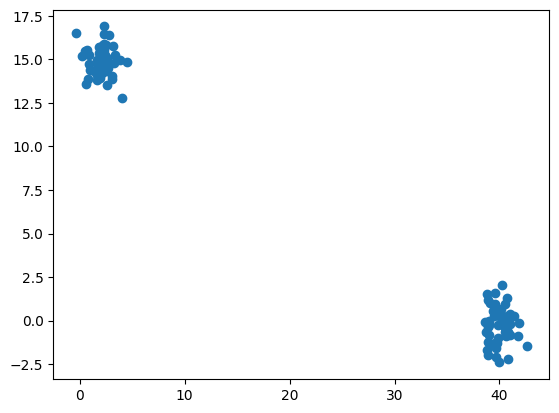

In [ ]:
plt.scatter(X, y)

In [ ]:
df = pd.DataFrame({'X': X, 'y': y})

In [ ]:
km = MiniBatchKMeans(n_clusters=2)
labels = km.fit_predict(df)

In [ ]:
km.n_features_in_

16055

In [ ]:
labels[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
np.unique(labels)

array([0, 1], dtype=int32)

In [ ]:
my_array = np.array([5, 4, 5, 3, 5])
np.where(my_array == 5)

(array([0, 2, 4]),)

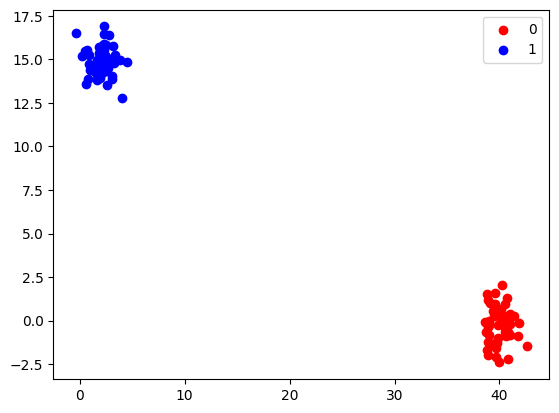

In [ ]:
cdict = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
for g in np.unique(labels): #[0, 1]
    ix = np.where(labels == g) # индексы тех элементов, которые равны g
    ax.scatter(X[ix], y[ix], c = cdict[g], label = g)
ax.legend()
plt.show()

# Осуществление кластеризации на практике. Подбор оптимального количества кластеров

Попробуем разобраться, как оценить качество кластеризации.

Один из простейших и наиболее часто используемых методов - подсчёт Silhouette Score.

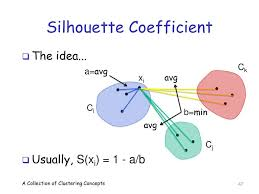

In [ ]:
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

In [ ]:
newsgroups_train.data[0]

'From: bil@okcforum.osrhe.edu (Bill Conner)\nSubject: Re: Not the Omni!\nNntp-Posting-Host: okcforum.osrhe.edu\nOrganization: Okcforum Unix Users Group\nX-Newsreader: TIN [version 1.1 PL6]\nLines: 18\n\nCharley Wingate (mangoe@cs.umd.edu) wrote:\n: \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.\n\nBill\n'

In [ ]:
preprocessed_text = [preprocess_text(t) for t in newsgroups_train.data]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [ ]:
tf.vocabulary_

{'bil': 1487,
 'bill': 1491,
 'conner': 2881,
 'subject': 13795,
 'omni': 9990,
 'organization': 10100,
 'okcforum': 9963,
 'unix': 15048,
 'user': 15179,
 'group': 6172,
 'tin': 14485,
 'version': 15352,
 'line': 8317,
 'charley': 2259,
 'wingate': 15784,
 'mangoe': 8644,
 'wrote': 15910,
 'please': 10754,
 'enlighten': 4630,
 'omnipotence': 9991,
 'contradictory': 3004,
 'definition': 3583,
 'occur': 9900,
 'universe': 15043,
 'governed': 6048,
 'rule': 12391,
 'nature': 9503,
 'thus': 14443,
 'god': 5999,
 'break': 1743,
 'anything': 670,
 'must': 9419,
 'allowed': 459,
 'somewhere': 13287,
 'therefore': 14361,
 'exist': 4965,
 'contradicts': 3005,
 'obviously': 9890,
 'omnipotent': 9992,
 'change': 2229,
 'say': 12553,
 'exactly': 4897,
 'defined': 3578,
 'certainly': 2186,
 'seem': 12729,
 'saying': 12555,
 'somehow': 13274,
 'define': 3577,
 'actually': 169,
 'cause': 2117,
 'mean': 8848,
 'like': 8295,
 'hear': 6381,
 'thought': 14408,
 'question': 11473,
 'jhwitten': 7633,
 'ju

In [ ]:
text = tf.fit_transform(preprocessed_text)

In [ ]:
text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 116652 stored elements and shape (1073, 16055)>

In [ ]:
n_clusters = [i for i in range(2, 21, 2)] # 2, 4, 6.. 18, 20
ssc = []
for i in n_clusters:
  km = MiniBatchKMeans(n_clusters=i, init_size=1024, batch_size=2048, random_state=20)
  km.fit(text)
  ssc.append(silhouette_score(text, km.labels_))

In [ ]:
ssc

[np.float64(0.009551191119723471),
 np.float64(0.008572907154905373),
 np.float64(0.00827368059144207),
 np.float64(0.00916490329866322),
 np.float64(0.012313305412514165),
 np.float64(0.014706247374069942),
 np.float64(0.016448313505949528),
 np.float64(0.01751713170489969),
 np.float64(0.019245155305392274),
 np.float64(0.019596740117533266)]

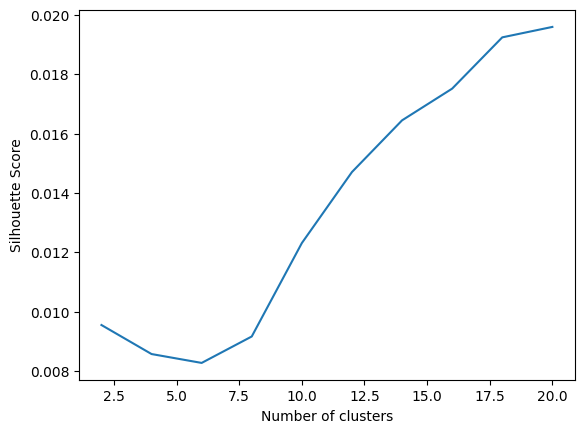

In [ ]:
plt.plot(n_clusters, ssc)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
km = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20)
km.fit(text)

MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=6, random_state=20)

In [ ]:
clusters = km.predict(text)

In [ ]:
clusters[:100]

array([0, 4, 2, 3, 0, 4, 4, 0, 0, 1, 2, 4, 2, 1, 4, 0, 5, 4, 4, 0, 2, 1,
       0, 5, 5, 5, 5, 4, 1, 4, 0, 4, 1, 1, 4, 4, 1, 4, 5, 5, 4, 5, 4, 4,
       3, 0, 1, 4, 4, 5, 0, 2, 4, 5, 4, 4, 3, 0, 1, 0, 4, 5, 2, 1, 4, 4,
       5, 4, 1, 5, 4, 4, 4, 4, 0, 1, 4, 4, 1, 2, 5, 4, 4, 0, 4, 1, 4, 0,
       4, 0, 5, 4, 0, 1, 1, 4, 4, 4, 4, 0], dtype=int32)

In [ ]:
df = pd.DataFrame(text.todense()).groupby(clusters).mean()
df

,0,1,2,3,4,5,6,7,8,9,...,16045,16046,16047,16048,16049,16050,16051,16052,16053,16054
0,0.000000,0.000000,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000259,0.004848,...,0.000000,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000657,0.000000,0.000938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000222,0.000000,0.000000,0.000000,0.000247,0.000041,0.000041,0.000038,0.000000,0.000000,...,0.000038,0.000000,0.000163,0.000552,0.000284,0.000041,0.000041,0.000041,0.000041,0.000082
5,0.000415,0.000679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
my_array = np.array([0.1, 0.85, 0.32])

In [ ]:
sort_indexes = np.argsort(my_array)
sort_indexes

array([0, 2, 1])

In [ ]:
my_array[sort_indexes]

array([0.1 , 0.32, 0.85])

In [ ]:
labels = tf.get_feature_names_out()

In [ ]:
labels

array(['aa', 'aaa', 'aah', ..., 'zwakke', 'zware', 'zwarte'], dtype=object)

In [ ]:
for i, r in df.iterrows():
  print(np.argsort(r)[-10:])
  break

16045    15881
16046      865
16047     1382
16048    15902
16049    12553
16050     1462
16051    10001
16052      994
16053      995
16054     5999
Name: 0, dtype: int64


In [ ]:
labels[7756]

'voting'

In [ ]:
for i, r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([labels[t] for t in np.argsort(r)[-10:]]))


Cluster 0
would, article, believe, writes, say, bible, one, atheism, atheist, god

Cluster 1
jon, writes, allan, moral, schneider, morality, system, pat, livesey, keith

Cluster 2
prize, would, work, space, nsmca, toronto, zoology, spencer, moon, henry

Cluster 3
aws, orbit, sherzer, gehrels, would, bill, comet, jupiter, allen, higgins

Cluster 4
shuttle, launch, university, orbit, would, organization, line, subject, nasa, space

Cluster 5
bobbe, one, gregg, religion, people, rushdie, islamic, muslim, jaeger, islam


In [ ]:
np.where(labels == 'attorney')

(array([555]),)

In [ ]:
df[555]

,555
0,0.028747
1,0.046055
2,0.048058
3,0.036412
4,0.051898
5,0.064225
6,0.045493
7,0.058973
8,0.021310
9,0.020801


# Практикум

Поработаем с различными подходами к кластеризации.

Попробуйте провести кластеризацию текстов с предобработкой и без, используя как CountVectorizer, так и TfidfVectorizer. Оцените качество кластеризации с помощью метрики Silhouette Score и вручную, оценивая ключевые слова из различных кластеров.

В конце ноутбука напишите выводы: какой подход к кластеризации показал себя лучше всего и почему?

In [8]:
texts = [
    "The movie was very interesting and exciting",
    "I liked the plot and the acting",
    "The movie was boring and too long",
    "Very bad acting in the movie",
    "The phone works fast and smoothly",
    "Great screen and good camera",
    "The battery drains very fast",
    "The phone freezes and lags"
]

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(texts)

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(texts)

Сделаем два кластера фильмы и телефоны.

In [12]:
k = 2

kmeans_count = KMeans(n_clusters=k, random_state=42)
labels_count = kmeans_count.fit_predict(X_count)

kmeans_tfidf = KMeans(n_clusters=k, random_state=42)
labels_tfidf = kmeans_tfidf.fit_predict(X_tfidf)


In [13]:
score_count = silhouette_score(X_count, labels_count)
score_tfidf = silhouette_score(X_tfidf, labels_tfidf)

print("Silhouette Score (CountVectorizer):", score_count)
print("Silhouette Score (TF-IDF):", score_tfidf)


Silhouette Score (CountVectorizer): 0.07390066581033596
Silhouette Score (TF-IDF): 0.04580414634520824


In [14]:
def show_clusters(texts, labels):
    clusters = {}
    for text, label in zip(texts, labels):
        clusters.setdefault(label, []).append(text)

    for k, v in clusters.items():
        print(f"\nCluster {k}:")
        for t in v:
            print(" -", t)

print("TF-IDF clusters:")
show_clusters(texts, labels_tfidf)


TF-IDF clusters:

Cluster 0:
 - The movie was very interesting and exciting
 - I liked the plot and the acting
 - The movie was boring and too long
 - Very bad acting in the movie
 - Great screen and good camera
 - The battery drains very fast

Cluster 1:
 - The phone works fast and smoothly
 - The phone freezes and lags


В результате эксперимента было получено, что значение коэффициента силуэта для CountVectorizer составило 0.0739, а для TF-IDF — 0.0458. Низкие значения метрики объясняются небольшим объёмом выборки и высокой семантической близостью текстов. Несмотря на это, алгоритм корректно сгруппировал документы по смыслу. В условиях малого набора данных CountVectorizer показал немного лучшие результаты по сравнению с TF-IDF.

# Простейший подход к отражению семантики в векторе слова: Word2Vec

Контекстные эмбеддинги

In [ ]:
lines = ['I have a cat', 'I have a dog', 'My dog is smart', 'My cat is cunning']
words = list(set(' '.join(lines).split()))

print(words)

emb = [0 for i in range(len(words))]
vocab = {}
for w in words:
  vocab.update({w: emb.copy()})

print(vocab)

for line in lines:
  l = ['pad', 'pad'] + line.split() + ['pad', 'pad']
  for i in range(2, len(line.split()) + 2):
    for j in range(i - 2, i + 3):
      if l[j] != 'pad':
        if i != j:
          vocab[l[i]][words.index(l[j])] += 1

print(vocab)

['smart', 'My', 'a', 'is', 'I', 'cunning', 'have', 'dog', 'cat']
{'smart': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'My': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'a': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'is': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'I': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'cunning': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'have': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'dog': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'cat': [0, 0, 0, 0, 0, 0, 0, 0, 0]}
{'smart': [0, 0, 0, 1, 0, 0, 0, 1, 0], 'My': [0, 0, 0, 2, 0, 0, 0, 1, 1], 'a': [0, 0, 0, 0, 2, 0, 2, 1, 1], 'is': [1, 2, 0, 0, 0, 1, 0, 1, 1], 'I': [0, 0, 2, 0, 0, 0, 2, 0, 0], 'cunning': [0, 0, 0, 1, 0, 0, 0, 0, 1], 'have': [0, 0, 2, 0, 2, 0, 0, 1, 1], 'dog': [1, 1, 1, 1, 0, 0, 1, 0, 0], 'cat': [0, 1, 1, 1, 0, 1, 1, 0, 0]}


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(vocab, index=words)

In [ ]:
df

,smart,My,a,is,I,cunning,have,dog,cat
smart,0,0,0,1,0,0,0,1,0
My,0,0,0,2,0,0,0,1,1
a,0,0,0,0,2,0,2,1,1
is,1,2,0,0,0,1,0,1,1
I,0,0,2,0,0,0,2,0,0
cunning,0,0,0,1,0,0,0,0,1
have,0,0,2,0,2,0,0,1,1
dog,1,1,1,1,0,0,1,0,0
cat,0,1,1,1,0,1,1,0,0


Косинусное расстояние: мера схожести семантики слов

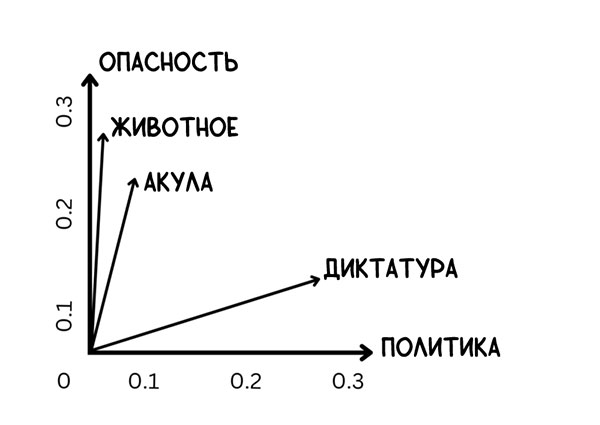

In [ ]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
  a = np.array(a)
  b = np.array(b)
  return dot(a, b)/(norm(a)*norm(b))

In [ ]:
cos_sim(vocab['cat'], vocab['dog'])

np.float64(0.7999999999999998)

In [ ]:
cos_sim(vocab['cat'], vocab['smart'])

np.float64(0.31622776601683794)

**Основная идея:** модель должна запомнить, какие слова используются в ближайшем контексте со словом Х.

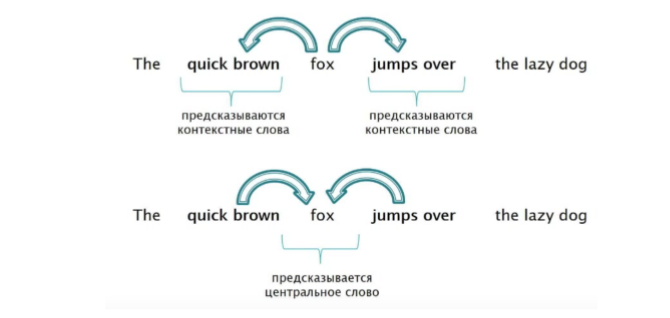[Текст ссылки](https://)

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 63.4 MB/s eta 0:00:00


In [ ]:
import gensim.downloader as api

info = api.info()
model = api.load("word2vec-google-news-300")
model.most_similar("cat")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [ ]:
from gensim.models import Word2Vec

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data = fetch_20newsgroups(subset='train', categories=['sci.space'])

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tokenized_data = [word_tokenize(d) for d in data.data]

In [ ]:
m1 = Word2Vec()

In [ ]:
m1.build_vocab(tokenized_data)

In [ ]:
m1.train(tokenized_data, total_examples=m1.corpus_count, epochs=5)

(717411, 1146845)